In [32]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [44]:
import sklearn
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from models.fcnn import FCNNv1
from models.base import PytorchEstimator
from models.custom_pipeline import CustomPipeline
from models.utils import plot_train_validation_loss_per_epoch
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [41]:
X, y = load_digits(return_X_y=True)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

In [45]:
sklearn.set_config(enable_metadata_routing=True)

model_example = PytorchEstimator(model_class=FCNNv1,
                              model_arch={'HIDDEN_DIMS':[128, 64]},
                              task="classification",
                              epochs=200).set_fit_request(val_data=True)

pipeline = CustomPipeline([PCA(15)], model_example)

pipeline.fit(X_train, y_train, val_data=(X_val, y_val))

sklearn.set_config(enable_metadata_routing=False)

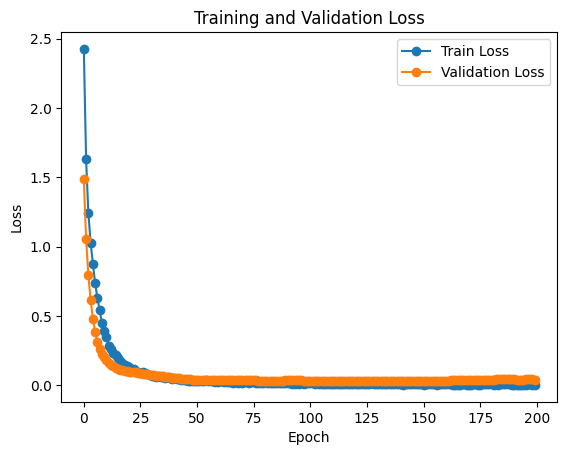

In [43]:
fig, ax = plt.subplots()
plot_train_validation_loss_per_epoch(model_example.train_loss,
                                     model_example.validation_loss,
                                     ax)
plt.show()

In [38]:
print(f"Actual labels: {y_val[:10]} \nPredicted labels: {pipeline.predict(X_val)[:10]}")

Actual labels: [4 2 4 5 8 6 9 1 8 2] 
Predicted labels: [4 2 4 5 8 6 9 1 8 2]
